In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [2]:

#Import the Dataset

new_df = pd.read_excel('energyefficiency.xlsx')

In [4]:
print(new_df)

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
5    0.90  563.5  318.5  122.50  7.0   3  0.0   0  21.46  25.38
6    0.90  563.5  318.5  122.50  7.0   4  0.0   0  20.71  25.16
7    0.90  563.5  318.5  122.50  7.0   5  0.0   0  19.68  29.60
8    0.86  588.0  294.0  147.00  7.0   2  0.0   0  19.50  27.30
9    0.86  588.0  294.0  147.00  7.0   3  0.0   0  19.95  21.97
10   0.86  588.0  294.0  147.00  7.0   4  0.0   0  19.34  23.49
11   0.86  588.0  294.0  147.00  7.0   5  0.0   0  18.31  27.87
12   0.82  612.5  318.5  147.00  7.0   2  0.0   0  17.05  23.77
13   0.82  612.5  318.5  147.00  7.0   3  0.0   0  17.41  21.46
14   0.82  612.5  318.5  147.00  7.0   4

In [6]:
new_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [7]:
new_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [8]:
#to rename columns

column_names = {'X1':'Relative_Compactness', 
                'X2': 'Surface_Area', 
                'X3':  'Wall_Area', 
                'X4': 'Roof_Area', 
                'X5': 'Overall_Height',
                'X6': 'Orientation', 
                'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 
                'Y2': 'Cooling_Load'}

#This can also be done by Mapping

#df.columns = df.columns.map(
                #{'X1':'Relative_Compactness', 
                    #'X2': 'Surface_Area', 
                    #'X3': 'Wall_Area', 
                    #'X4': 'Roof_Area', 
                    #'X5': 'Overall_Height', 
                    #'X6': 'Orientation', 
                    #'X7': 'Glazing_Area', 
                    #'X8': 'Glazing_Area_Distribution', 
                    #'Y1': 'Heating_Load', 
                    #'Y2': 'Cooling_Load'})
                    
                    

In [9]:
new_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [16]:

new_df_ = new_df.rename(columns=column_names)

In [17]:
print(new_df_)

     Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.98         514.5      294.0     110.25             7.0   
4                    0.90         563.5      318.5     122.50             7.0   
5                    0.90         563.5      318.5     122.50             7.0   
6                    0.90         563.5      318.5     122.50             7.0   
7                    0.90         563.5      318.5     122.50             7.0   
8                    0.86         588.0      294.0     147.00             7.0   
9                    0.86         588.0      294.0     147.00             7.0   
10                   0.86         588.0      294.0     147.00             7.0   
11                   0.86   

In [18]:
new_df_.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [24]:
#select a sample of the dataset
simple_linear_df = new_df_[['Relative_Compactness', 'Cooling_Load']].sample(15, random_state=2)

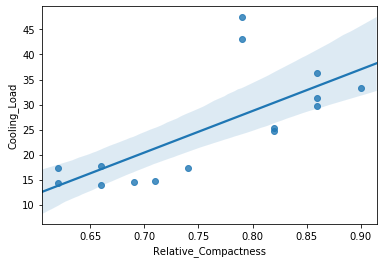

In [25]:
#Regression plot using seaborn (a visualization library)

sns.regplot(x='Relative_Compactness', y="Cooling_Load", data=simple_linear_df)

# MEAN ABSOLUTE ERROR

In [27]:
#Normalise dataset to a common scale using the min max scaler


scaler = MinMaxScaler()

normalised_df = pd.DataFrame(scaler.fit_transform(new_df_), columns=new_df_.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

In [29]:
#Now, split our dataset into the training and testing dataset. 
#Recall that we had earlier segmented the features and target variables.

#from sklearn.model_selection import train_test_split This has been added up 

x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)

In [32]:
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

In [40]:
#MAE
#from sklearn.metrics import mean_absolute_error This is added up 
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 	#prints 0.063

0.063

In [47]:
#R-SQUARE


#from sklearn.metrics import r2_score  This has been added up
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)	#prints 0.894

0.894

In [48]:
#Residual Sum of Squares

rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)	    #prints 1.823

1.817

In [50]:
#ROOT MEAN SQUARE
#from sklearn.metrics import  mean_squared_error - This is added up

rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 	#prints 0.089

0.089

In [52]:
#COMPARING THE EFFECTS OF REGULARISATION

def get_weights_df(linear_model, feat, col_name):
  #the function to return the weight of every feature

  weights = pd.Series(linear_model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df



In [56]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [60]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Relative_Compactness,-0.606412,-0.283471,-0.027719
1,Roof_Area,-0.328099,-0.163192,-0.000000
2,Surface_Area,-0.235022,-0.062275,0.000000
3,Orientation,0.003399,0.003369,0.000000
4,Wall_Area,0.018947,0.103061,0.200087
5,Glazing_Area_Distribution,0.028452,0.029088,0.021431
6,Glazing_Area,0.215042,0.212449,0.206132
7,Overall_Height,0.393549,0.442467,0.463482


In [59]:
print(final_weights)

                    Features  Linear_Model_Weight  Ridge_Weight  Lasso_weight
0       Relative_Compactness            -0.606412     -0.283471     -0.027719
1                  Roof_Area            -0.328099     -0.163192     -0.000000
2               Surface_Area            -0.235022     -0.062275      0.000000
3                Orientation             0.003399      0.003369      0.000000
4                  Wall_Area             0.018947      0.103061      0.200087
5  Glazing_Area_Distribution             0.028452      0.029088      0.021431
6               Glazing_Area             0.215042      0.212449      0.206132
7             Overall_Height             0.393549      0.442467      0.463482
